Importing libraries

In [59]:
import pandas as pd

In [60]:
import numpy as np

Importing kaggle data from csv files

In [61]:
kaggle_training_data = pd.read_csv("kaggleData/train.csv")
X_kaggle_test_data = pd.read_csv("kaggleData/test.csv")

In [62]:
kaggle_training_data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [5]:
Y_column_names = ["casual", "registered", "count"];

In [6]:
X_kaggle_training_data = kaggle_training_data.drop(Y_column_names, axis=1)

In [7]:
Y_kaggle_training_data = kaggle_training_data[Y_column_names].copy()

In [8]:
X_kaggle_training_data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000
...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032


In [9]:
Y_kaggle_training_data

,casual,registered,count
0,3,13,16
1,8,32,40
2,5,27,32
3,3,10,13
4,0,1,1
...,...,...,...
10881,7,329,336
10882,10,231,241
10883,4,164,168
10884,12,117,129


In [10]:
X_kaggle_training_data.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
dtype: object

In [11]:
X_kaggle_training_data["datetime"] = pd.to_datetime(X_kaggle_training_data["datetime"])

In [12]:
X_kaggle_training_data.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
dtype: object

Changing datetime to sepparate columns

In [15]:
X_kaggle_training_data["year"] = X_kaggle_training_data["datetime"].dt.year
X_kaggle_training_data["month"] = X_kaggle_training_data["datetime"].dt.month
X_kaggle_training_data["day"] = X_kaggle_training_data["datetime"].dt.day
X_kaggle_training_data["hour"] = X_kaggle_training_data["datetime"].dt.hour

In [20]:
dt = pd.DatetimeIndex(X_kaggle_training_data["datetime"])

X_kaggle_training_data["dow"] = dt.dayofweek

In [31]:
X_kaggle_training_data.head(70)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,dow
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,2011,1,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,2011,1,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,2011,1,1,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,2011,1,1,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,2011,1,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,2011-01-03 20:00:00,1,0,1,1,8.20,11.365,47,7.0015,2011,1,3,20,0
66,2011-01-03 21:00:00,1,0,1,1,7.38,9.850,64,8.9981,2011,1,3,21,0
67,2011-01-03 22:00:00,1,0,1,1,5.74,7.575,69,8.9981,2011,1,3,22,0
68,2011-01-03 23:00:00,1,0,1,1,7.38,10.605,55,7.0015,2011,1,3,23,0


In [24]:
import seaborn as sns

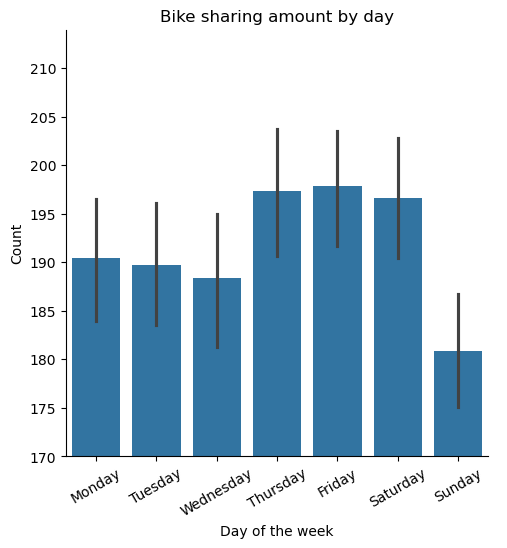

In [30]:
data = pd.concat([X_kaggle_training_data, Y_kaggle_training_data])
categorical_plot = sns.catplot(data=data, x="dow", y='count', kind='bar')
categorical_plot.set(ylim=170, title='Bike sharing amount by day', ylabel='Count', xlabel='Day of the week',
                     xticks=[0, 1, 2, 3, 4, 5, 6])
categorical_plot.set_xticklabels(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"],
                                 rotation=30)
categorical_plot

In [32]:
X_kaggle_training_data.drop("datetime", axis=1, inplace=True)

In [33]:
X_kaggle_training_data

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,dow
0,1,0,0,1,9.84,14.395,81,0.0000,2011,1,1,0,5
1,1,0,0,1,9.02,13.635,80,0.0000,2011,1,1,1,5
2,1,0,0,1,9.02,13.635,80,0.0000,2011,1,1,2,5
3,1,0,0,1,9.84,14.395,75,0.0000,2011,1,1,3,5
4,1,0,0,1,9.84,14.395,75,0.0000,2011,1,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,2012,12,19,19,2
10882,4,0,1,1,14.76,17.425,57,15.0013,2012,12,19,20,2
10883,4,0,1,1,13.94,15.910,61,15.0013,2012,12,19,21,2
10884,4,0,1,1,13.94,17.425,61,6.0032,2012,12,19,22,2


In [34]:
Y_kaggle_training_data = Y_kaggle_training_data["count"]

In [35]:
Y_kaggle_training_data

0         16
1         40
2         32
3         13
4          1
        ... 
10881    336
10882    241
10883    168
10884    129
10885     88
Name: count, Length: 10886, dtype: int64

In [36]:
X_kaggle_test_data["datetime"] = pd.to_datetime(X_kaggle_test_data["datetime"])

In [37]:
test_datetime = X_kaggle_test_data["datetime"]

In [38]:
X_kaggle_test_data["year"] = X_kaggle_test_data["datetime"].dt.year
X_kaggle_test_data["month"] = X_kaggle_test_data["datetime"].dt.month
X_kaggle_test_data["day"] = X_kaggle_test_data["datetime"].dt.day
X_kaggle_test_data["hour"] = X_kaggle_test_data["datetime"].dt.hour

In [40]:
dt = pd.DatetimeIndex(X_kaggle_test_data["datetime"])

X_kaggle_test_data["dow"] = dt.dayofweek

In [42]:
X_kaggle_test_data.drop("datetime", axis=1, inplace=True)

In [43]:
X_kaggle_test_data

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,dow
0,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0,3
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1,3
2,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2,3
3,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,3
4,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6488,1,0,1,2,10.66,12.880,60,11.0014,2012,12,31,19,0
6489,1,0,1,2,10.66,12.880,60,11.0014,2012,12,31,20,0
6490,1,0,1,1,10.66,12.880,60,11.0014,2012,12,31,21,0
6491,1,0,1,1,10.66,13.635,56,8.9981,2012,12,31,22,0


In [20]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
rfc = RandomForestClassifier()

In [22]:
rfc.fit(X_kaggle_training_data, Y_kaggle_training_data)

RandomForestClassifier()

In [26]:
Y_rfc_kaggle_test_data = rfc.predict(X_kaggle_test_data)

In [26]:
Y_rfc_kaggle_test_data

NameError: name 'Y_kaggle_test_data' is not defined

In [32]:
predictions = pd.DataFrame({
    "datetime": test_datetime,  # The first column, renamed to "datetime"
    "count": Y_kaggle_test_data  # The second column, from the array
})

In [36]:
predictions

,datetime,count
0,2011-01-20 00:00:00,19
1,2011-01-20 01:00:00,6
2,2011-01-20 02:00:00,3
3,2011-01-20 03:00:00,3
4,2011-01-20 04:00:00,1
...,...,...
6488,2012-12-31 19:00:00,191
6489,2012-12-31 20:00:00,191
6490,2012-12-31 21:00:00,373
6491,2012-12-31 22:00:00,102


In [37]:
df.to_csv("submission.csv", index=False)

In [96]:
from sklearn.ensemble import RandomForestRegressor

In [97]:
rfr = RandomForestRegressor()

In [98]:
rfr.fit(X_kaggle_training_data, Y_kaggle_training_data)

RandomForestRegressor()

In [99]:
Y_rfr_kaggle_test_data = rfg.predict(X_kaggle_test_data)

In [100]:
Y_rfr_kaggle_test_data = np.round(Y_kaggle_test_data).astype(int)

In [101]:
Y_rfr_kaggle_test_data

array([ 13,   6,   6, ..., 144, 117,  70])

In [102]:
prediction_rfr = pd.DataFrame({
    "datetime": test_datetime,  # The first column, renamed to "datetime"
    "count": Y_rfr_kaggle_test_data  # The second column, from the array
})

In [103]:
prediction_rfr

,datetime,count
0,2011-01-20 00:00:00,13
1,2011-01-20 01:00:00,6
2,2011-01-20 02:00:00,6
3,2011-01-20 03:00:00,4
4,2011-01-20 04:00:00,3
...,...,...
6488,2012-12-31 19:00:00,310
6489,2012-12-31 20:00:00,206
6490,2012-12-31 21:00:00,144
6491,2012-12-31 22:00:00,117


In [41]:
prediction_rfr.to_csv("submission_rfr.csv", index=False)

In [104]:
from sklearn.model_selection import GridSearchCV

In [110]:
from sklearn.metrics import make_scorer

In [115]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [12, 8, 6, 'sqrt', 'log2']
}

In [116]:
rfr_2 = RandomForestRegressor()

In [117]:
scorer = make_scorer(mean_squared_error, greater_is_better=False)

In [118]:
grid_search = GridSearchCV(
    estimator=rfr_2,
    param_grid=param_grid,
    scoring=scorer,
    cv=5,
    verbose=2,
    n_jobs=-1
)

In [119]:
grid_search.fit(X_kaggle_training_data, Y_kaggle_training_data)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': [12, 8, 6, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring=make_scorer(mean_squared_error, greater_is_better=False, response_method='predict'),
             verbose=2)

In [120]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [121]:
best_params

{'max_depth': 20,
 'max_features': 8,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [128]:
Y_rfr_2_kaggle_test_data = best_model.predict(X_kaggle_test_data)
Y_rfr_2_kaggle_test_data = np.round(Y_rfr_2_kaggle_test_data).astype(int)

In [129]:
Y_rfr_2_kaggle_test_data

array([ 13,   7,   6, ..., 148, 110,  71])

In [130]:
prediction_rfr_2 = pd.DataFrame({
    "datetime": test_datetime,
    "count": Y_rfr_2_kaggle_test_data
})

In [131]:
prediction_rfr_2.to_csv("submission_rfr_2.csv", index=False)

In [132]:
from sklearn.linear_model import LinearRegression

In [133]:
linear_regressor = LinearRegression()

In [134]:
linear_regressor.fit(X_kaggle_training_data, Y_kaggle_training_data)

LinearRegression()

In [135]:
Y_lr_kaggle_test_data = linear_regressor.predict(X_kaggle_test_data)

In [137]:
Y_lr_kaggle_test_data = np.round(Y_lr_kaggle_test_data)

In [138]:
Y_lr_kaggle_test_data

array([-30., -27., -20., ..., 319., 338., 327.])

In [140]:
prediction_lr = pd.DataFrame({
    "datetime": test_datetime,
    "count": Y_lr_kaggle_test_data
})

In [141]:
prediction_lr.to_csv("submission_lr.csv", index=False)

In [142]:
from sklearn.linear_model import Lasso, Ridge

In [143]:
lasso = Lasso()
ridge = Ridge()

In [144]:
lasso.fit(X_kaggle_training_data, Y_kaggle_training_data)
ridge.fit(X_kaggle_training_data, Y_kaggle_training_data)

Ridge()

In [146]:
Y_l_kaggle_test_data = lasso.predict(X_kaggle_test_data)
Y_r_kaggle_test_data = ridge.predict(X_kaggle_test_data)

In [147]:
Y_l_kaggle_test_data

array([-27.4742839 , -23.55246284, -15.82441533, ..., 289.42245617,
       307.8421391 , 296.73842664])

In [148]:
Y_r_kaggle_test_data

array([-30.09185054, -27.43023174, -19.65224952, ..., 319.21349968,
       337.4604362 , 326.89736483])

In [149]:
pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 1.0/124.9 MB 5.6 MB/s eta 0:00:23
    --------------------------------------- 2.1/124.9 MB 5.1 MB/s eta 0:00:25
    --------------------------------------- 2.9/124.9 MB 4.9 MB/s eta 0:00:25
   - -------------------------------------- 3.9/124.9 MB 5.0 MB/s eta 0:00:25
   - -------------------------------------- 5.0/124.9 MB 4.9 MB/s eta 0:00:25
   - -------------------------------------- 6.0/124.9 MB 4.9 MB/s eta 0:00:25
   -- ------------------------------------- 7.1/124.9 MB 4.8 MB/s eta 0:00:25
   -- ------------------------------------- 8.1/124.9 MB 4.8 MB/s eta 0:00:25
   -- ------------------------------------- 8.9/124.9 MB 4.8 MB/s eta 0:00:25
   --- ------------------------------------ 10.0/124.9 MB 4.8 MB/s eta 0:00:24
   --- ------------------------------------ 11.0/124.9 MB 4.8 MB/s eta 0:00:24
   --- ------------------------------------ 12.1/124.9 MB 4.8 MB/s et

In [44]:
from xgboost import XGBRegressor

In [187]:
base_score = np.mean(Y_kaggle_training_data)

In [45]:
xgb_regressor = XGBRegressor(objective='reg:gamma')

In [46]:
xgb_regressor.fit(X_kaggle_training_data, Y_kaggle_training_data)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, objective='reg:gamma', ...)

In [47]:
xgb_kaggle_test_data = xgb_regressor.predict(X_kaggle_test_data)

In [201]:
xgb_kaggle_test_data = np.round(xgb_kaggle_test_data).astype(int)

In [202]:
xgb_kaggle_test_data = np.clip(xgb_kaggle_test_data, 0, None)

In [48]:
xgb_kaggle_test_data

array([ 13.918435,   4.620277,   4.325543, ..., 117.68523 ,  82.399635,
        53.146553], dtype=float32)

In [49]:
prediction_xgb = pd.DataFrame({
    "datetime": test_datetime,
    "count": xgb_kaggle_test_data
})

In [50]:
prediction_xgb.to_csv("submission_xgb_gamma_14.csv", index=False)

In [206]:
xgb_regressor = XGBRegressor(objective='reg:gamma')

In [207]:
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],          # Common learning rates
    'n_estimators': [100, 200, 500],                  # Number of boosting rounds
    'max_depth': [3, 5, 6, 7, 10],                            # Depth of trees
    'min_child_weight': [1, 5, 10],                    # Minimum weight of a child node
    'subsample': [0.5, 0.6, 0.8, 1.0],                      # Subsample ratio of training data
    'colsample_bytree': [0.5, 0.6, 0.8, 1.0],               # Subsample ratio of features
    'gamma': [0, 0.1, 0.2],                            # Regularization parameter for gamma (controls tree complexity)
    'alpha': [0, 0.1, 0.2],                            # L1 regularization term
}

In [209]:
grid_search_xgb = GridSearchCV(
    estimator=xgb_regressor,
    param_grid=param_grid,
    scoring=scorer,
    cv=5,
    verbose=2,
    n_jobs=-1
)

In [210]:
grid_search_xgb.fit(X_kaggle_training_data, Y_kaggle_training_data)

Fitting 5 folds for each of 32400 candidates, totalling 162000 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
             n_jobs=-1,
             param_grid={'alpha': [0, 0.1, 0.2],
                         'colsample_bytree': [0.5, 0.6, 0.8, 1.0],
                         'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
                         'max_depth': [3, 5, 6, 7, 10],
                         'min_child_weight': [1, 5, 10],
                         'n_estimators': [100, 200, 500],
                         'subsample': [0.5, 0.6, 0.8, 1.0]},
             scoring=make_scorer(mean_squared_error, greater_is_better=False, response_method='predict'),
             verbose=2)

In [213]:
best_params_xgb = grid_search_xgb.best_params_
best_model_xgb = grid_search_xgb.best_estimator_

In [214]:
best_params_xgb

{'alpha': 0.1,
 'colsample_bytree': 1.0,
 'gamma': 0.2,
 'learning_rate': 0.2,
 'max_depth': 3,
 'min_child_weight': 10,
 'n_estimators': 500,
 'subsample': 0.8}

In [217]:
Y_xgb_2_kaggle_test_data = best_model_xgb.predict(X_kaggle_test_data)
Y_xgb_2_kaggle_test_data = np.round(Y_xgb_2_kaggle_test_data).astype(int)

In [218]:
prediction_xgb_2 = pd.DataFrame({
    "datetime": test_datetime,
    "count": Y_xgb_2_kaggle_test_data
})

In [219]:
prediction_xgb_2.to_csv("submission_xgb_2_gamma.csv", index=False)

In [89]:
xgb_regressor = XGBRegressor(objective='reg:gamma')

In [80]:
X_kaggle_training_data

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0000,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0000,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0000,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0000,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0000,2011,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,2012,12,19,19
10882,4,0,1,1,14.76,17.425,57,15.0013,2012,12,19,20
10883,4,0,1,1,13.94,15.910,61,15.0013,2012,12,19,21
10884,4,0,1,1,13.94,17.425,61,6.0032,2012,12,19,22


In [51]:
X_kaggle_modified_training_data = X_kaggle_training_data.drop("month", axis=1)

In [52]:
X_kaggle_modified_training_data

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,day,hour,dow
0,1,0,0,1,9.84,14.395,81,0.0000,2011,1,0,5
1,1,0,0,1,9.02,13.635,80,0.0000,2011,1,1,5
2,1,0,0,1,9.02,13.635,80,0.0000,2011,1,2,5
3,1,0,0,1,9.84,14.395,75,0.0000,2011,1,3,5
4,1,0,0,1,9.84,14.395,75,0.0000,2011,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,2012,19,19,2
10882,4,0,1,1,14.76,17.425,57,15.0013,2012,19,20,2
10883,4,0,1,1,13.94,15.910,61,15.0013,2012,19,21,2
10884,4,0,1,1,13.94,17.425,61,6.0032,2012,19,22,2


In [53]:
X_kaggle_modified_test_data = X_kaggle_test_data.drop("month", axis=1)

In [54]:
X_kaggle_modified_test_data

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,day,hour,dow
0,1,0,1,1,10.66,11.365,56,26.0027,2011,20,0,3
1,1,0,1,1,10.66,13.635,56,0.0000,2011,20,1,3
2,1,0,1,1,10.66,13.635,56,0.0000,2011,20,2,3
3,1,0,1,1,10.66,12.880,56,11.0014,2011,20,3,3
4,1,0,1,1,10.66,12.880,56,11.0014,2011,20,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...
6488,1,0,1,2,10.66,12.880,60,11.0014,2012,31,19,0
6489,1,0,1,2,10.66,12.880,60,11.0014,2012,31,20,0
6490,1,0,1,1,10.66,12.880,60,11.0014,2012,31,21,0
6491,1,0,1,1,10.66,13.635,56,8.9981,2012,31,22,0


In [55]:
xgb_regressor.fit(X_kaggle_modified_training_data, Y_kaggle_training_data)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, objective='reg:gamma', ...)

In [56]:
Y_xgb_3_kaggle_test_data = xgb_regressor.predict(X_kaggle_modified_test_data)
# Y_xgb_3_kaggle_test_data = np.round(Y_xgb_3_kaggle_test_data).astype(int)

In [57]:
prediction_xgb_3 = pd.DataFrame({
    "datetime": test_datetime,
    "count": Y_xgb_3_kaggle_test_data
})

In [58]:
prediction_xgb_3.to_csv("submission_xgb_15_gamma.csv", index=False)

## Tensorflow

In [90]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [142]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import Input
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.callbacks import EarlyStopping

In [92]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_kaggle_modified_training_data)
X_test_scaled = scaler.transform(X_kaggle_modified_test_data)

In [96]:
Y_train = np.array(Y_kaggle_training_data).reshape(-1, 1)

In [166]:
model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),  # Define the input shape explicitly
    Dense(128, activation='relu'),  # Hidden layer 1
    Dropout(0.2),  # Regularization to prevent overfitting
    Dense(32, activation='relu'),  # Hidden layer 2
    Dense(16, activation='relu'),  # Hidden layer 3
    Dense(1, activation='exponential')  # Output layer with non-negative predictions
])

In [169]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [170]:
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

In [171]:
history = model.fit(
    X_train_scaled, Y_train,
    epochs=200,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/200
273/273 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 219334.6719 - mae: 153.9431 - val_loss: 86897.7500 - val_mae: 214.7109
Epoch 2/200
273/273 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 42392.9102 - mae: 137.0064 - val_loss: 88733.2578 - val_mae: 218.5020
Epoch 3/200
273/273 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 33577.4727 - mae: 125.4419 - val_loss: 74273.4688 - val_mae: 195.9868
Epoch 4/200
273/273 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 32720.3555 - mae: 121.2410 - val_loss: 69863.8516 - val_mae: 188.1437
Epoch 5/200
273/273 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 26584.3301 - mae: 110.2275 - val_loss: 63549.1875 - val_mae: 176.7534
Epoch 6/200
273/273 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 24241.0156 - mae: 103.7626 - val_loss: 54869.8242 - val_mae: 161.7267
Epoch 7/200
273/273 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 20752.1797 - mae: 96.3211 - val_loss: 39463.7305 - val_mae: 136.7465
Epoch 8/200
273/273 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 21174.4121 - mae: 96.

In [172]:
Y_tf_test_data = model.predict(X_test_scaled)

203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [173]:
Y_tf_test_data = np.round(Y_tf_test_data).astype(int)

In [174]:
Y_tf_test_data = [element[0] for element in Y_tf_test_data]

In [176]:
prediction_tf = pd.DataFrame({
    "datetime": test_datetime,
    "count": Y_tf_test_data
})

In [177]:
prediction_tf.to_csv("submission_tf_5.csv", index=False)

## Stacking models

In [179]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

In [224]:
X_train_meta, X_val_meta, Y_train_meta, Y_val_meta = train_test_split(X_train_scaled, Y_train)

In [225]:
rfr = RandomForestRegressor(n_estimators=1000, max_depth=15, random_state= 0, min_samples_split=5, n_jobs=-1)
xgb_regressor = XGBRegressor(objective='reg:gamma')

In [226]:
Y_train_meta = [column[0] for column in Y_train_meta]
Y_val_meta = [column[0] for column in Y_val_meta]

In [227]:
rfr.fit(X_train_meta, Y_train_meta)
xgb_regressor.fit(X_train_meta, Y_train_meta)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, objective='reg:gamma', ...)

In [228]:
rfr_preds = rfr.predict(X_val_meta).reshape(-1, 1)
xgb_preds = xgb_regressor.predict(X_val_meta).reshape(-1, 1)

In [229]:
stacked_features = np.hstack((rfr_preds, xgb_preds))

In [230]:
meta_model = LinearRegression()
meta_model.fit(stacked_features, Y_val_meta)

LinearRegression()

In [231]:
rfr_test_preds = rfr.predict(X_test_scaled).reshape(-1, 1)
xgb_test_preds = xgb_regressor.predict(X_test_scaled).reshape(-1, 1)
stacked_test_features = np.hstack((rfr_test_preds, xgb_test_preds))
final_predictions = meta_model.predict(stacked_test_features)

In [232]:
final_predictions = np.round(final_predictions).astype(int)

In [233]:
final_predictions = np.maximum(final_predictions, 0)

In [234]:
prediction_stacked_models = pd.DataFrame({
    "datetime": test_datetime,
    "count": final_predictions
})

In [235]:
prediction_stacked_models.to_csv("submission_stacked_models.csv", index=False)

# Improving the dataset

In [22]:
seasons = pd.get_dummies(X_kaggle_training_data["season"], prefix="season")
X_kaggle_training_data = pd.concat([X_kaggle_training_data, seasons], axis=1)

In [24]:
seasons = pd.get_dummies(X_kaggle_test_data["season"], prefix="season")
X_kaggle_test_data = pd.concat([X_kaggle_test_data, seasons], axis=1)

In [26]:
weather = pd.get_dummies(X_kaggle_training_data["weather"], prefix="weather")
X_kaggle_training_data = pd.concat([X_kaggle_training_data, weather], axis=1)

In [27]:
weather = pd.get_dummies(X_kaggle_test_data["weather"], prefix="weather")
X_kaggle_test_data = pd.concat([X_kaggle_test_data, weather], axis=1)

In [31]:
X_kaggle_training_data.drop(["season", "weather"], inplace=True, axis=1)
X_kaggle_test_data.drop(["season", "weather"], inplace=True, axis=1)

In [34]:
X_kaggle_training_data["year"] = X_kaggle_training_data["year"].map({2011:0, 2012:1})
X_kaggle_test_data["year"] = X_kaggle_test_data["year"].map({2011:0, 2012:1})

In [36]:
X_kaggle_test_data

,holiday,workingday,temp,atemp,humidity,windspeed,year,month,day,hour,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,0,1,10.66,11.365,56,26.0027,0,1,20,0,True,False,False,False,True,False,False,False
1,0,1,10.66,13.635,56,0.0000,0,1,20,1,True,False,False,False,True,False,False,False
2,0,1,10.66,13.635,56,0.0000,0,1,20,2,True,False,False,False,True,False,False,False
3,0,1,10.66,12.880,56,11.0014,0,1,20,3,True,False,False,False,True,False,False,False
4,0,1,10.66,12.880,56,11.0014,0,1,20,4,True,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6488,0,1,10.66,12.880,60,11.0014,1,12,31,19,True,False,False,False,False,True,False,False
6489,0,1,10.66,12.880,60,11.0014,1,12,31,20,True,False,False,False,False,True,False,False
6490,0,1,10.66,12.880,60,11.0014,1,12,31,21,True,False,False,False,True,False,False,False
6491,0,1,10.66,13.635,56,8.9981,1,12,31,22,True,False,False,False,True,False,False,False


In [85]:
from sklearn.ensemble import RandomForestRegressor

In [86]:
rfr = RandomForestRegressor(max_features=18, n_estimators=500, n_jobs=-1)

In [87]:
rfr.fit(X_kaggle_training_data, Y_kaggle_training_data)

RandomForestRegressor(max_features=18, n_estimators=500, n_jobs=-1)

In [88]:
Y_kaggle_test_data = rfr.predict(X_kaggle_test_data)

In [96]:
Y_kaggle_test_data

array([ 12.309011 ,   3.9609559,   3.5650918, ..., 158.06003  ,
       121.64384  ,  77.86467  ], dtype=float32)

In [66]:
Y_kaggle_test_data = np.round(Y_kaggle_test_data).astype(int)

In [90]:
prediction_rfr = pd.DataFrame({
    "datetime": test_datetime,  # The first column, renamed to "datetime"
    "count": Y_kaggle_test_data  # The second column, from the array
})

In [91]:
prediction_rfr.to_csv("submission_rfr_8.csv", index=False)

In [92]:
from xgboost import XGBRegressor

In [136]:
xgb_regressor = XGBRegressor(objective='reg:gamma')

In [137]:
X_modified_training_data = X_kaggle_training_data.drop("month", axis=1)
X_modified_test_data = X_kaggle_test_data.drop("month", axis=1)

In [138]:
hours = pd.get_dummies(X_modified_training_data["hour"], prefix="hour")
X_modified_training_data = pd.concat([X_modified_training_data, hours], axis=1)

In [139]:
hours = pd.get_dummies(X_modified_test_data["hour"], prefix="hour")
X_modified_test_data = pd.concat([X_modified_test_data, hours], axis=1)

In [141]:
days = pd.get_dummies(X_modified_training_data["day"], prefix="day")
X_modified_training_data = pd.concat([X_modified_training_data, days], axis=1)
days = pd.get_dummies(X_modified_test_data["day"], prefix="day")
X_modified_test_data = pd.concat([X_modified_test_data, days], axis=1)

In [144]:
X_modified_training_data

,holiday,workingday,temp,atemp,humidity,windspeed,year,day,hour,season_1,...,day_10,day_11,day_12,day_13,day_14,day_15,day_16,day_17,day_18,day_19
0,0,0,9.84,14.395,81,0.0000,0,1,0,True,...,False,False,False,False,False,False,False,False,False,False
1,0,0,9.02,13.635,80,0.0000,0,1,1,True,...,False,False,False,False,False,False,False,False,False,False
2,0,0,9.02,13.635,80,0.0000,0,1,2,True,...,False,False,False,False,False,False,False,False,False,False
3,0,0,9.84,14.395,75,0.0000,0,1,3,True,...,False,False,False,False,False,False,False,False,False,False
4,0,0,9.84,14.395,75,0.0000,0,1,4,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,0,1,15.58,19.695,50,26.0027,1,19,19,False,...,False,False,False,False,False,False,False,False,False,True
10882,0,1,14.76,17.425,57,15.0013,1,19,20,False,...,False,False,False,False,False,False,False,False,False,True
10883,0,1,13.94,15.910,61,15.0013,1,19,21,False,...,False,False,False,False,False,False,False,False,False,True
10884,0,1,13.94,17.425,61,6.0032,1,19,22,False,...,False,False,False,False,False,False,False,False,False,True


In [145]:
xgb_regressor.fit(X_modified_training_data, Y_kaggle_training_data)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, objective='reg:gamma', ...)

In [146]:
Y_kaggle_test_data = xgb_regressor.predict(X_modified_test_data)

ValueError: feature_names mismatch: ['holiday', 'workingday', 'temp', 'atemp', 'humidity', 'windspeed', 'year', 'day', 'hour', 'season_1', 'season_2', 'season_3', 'season_4', 'weather_1', 'weather_2', 'weather_3', 'weather_4', 'hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23', 'day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6', 'day_7', 'day_8', 'day_9', 'day_10', 'day_11', 'day_12', 'day_13', 'day_14', 'day_15', 'day_16', 'day_17', 'day_18', 'day_19'] ['holiday', 'workingday', 'temp', 'atemp', 'humidity', 'windspeed', 'year', 'day', 'hour', 'season_1', 'season_2', 'season_3', 'season_4', 'weather_1', 'weather_2', 'weather_3', 'weather_4', 'hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23', 'day_20', 'day_21', 'day_22', 'day_23', 'day_24', 'day_25', 'day_26', 'day_27', 'day_28', 'day_29', 'day_30', 'day_31']
expected day_7, day_9, day_18, day_3, day_5, day_17, day_15, day_11, day_19, day_12, day_2, day_14, day_10, day_4, day_6, day_16, day_1, day_8, day_13 in input data
training data did not have the following fields: day_27, day_23, day_30, day_29, day_24, day_25, day_21, day_22, day_28, day_26, day_31, day_20

In [129]:
prediction_xgb = pd.DataFrame({
    "datetime": test_datetime,  # The first column, renamed to "datetime"
    "count": Y_kaggle_test_data  # The second column, from the array
})

In [130]:
prediction_xgb.to_csv("submission_xgb_12_gamma.csv", index=False)